

##  Energy Consumption Prediction with Linear Regression











### 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

-----

### 2. Create and Inspect Sample Dataset

In [ ]:
np.random.seed(0)

days = pd.date_range('2025-01-25', periods=100)

temperature = np.random.randint(20, 40, size=100)

energy = 200 + (40 - temperature) * 2 + np.random.randint(-10, 10, size=100)

df = pd.DataFrame({
    'date': days,
    'temperature': temperature,
    'energy_consumption': energy
})

print("First 5 rows of the initial dataset:")
df.head()

First 5 rows of the initial dataset:


date  temperature  energy_consumption
0 2025-01-25           32                 219
1 2025-01-26           35                 216
2 2025-01-27           20                 237
3 2025-01-28           23                 233
4 2025-01-29           23                 224

In [ ]:
try:
    df = pd.read_csv('/content/energy_sample_data_2025.csv')
    print("First 5 rows of the loaded dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: '/content/energy_sample_data_2025.csv' not found. Please replace with your actual data file.")
    df = None

First 5 rows of the loaded dataset:
         date  temperature  energy_consumption
0  2025-01-01           32                 215
1  2025-01-02           35                 219
2  2025-01-03           20                 246
3  2025-01-04           23                 243
4  2025-01-05           23                 229


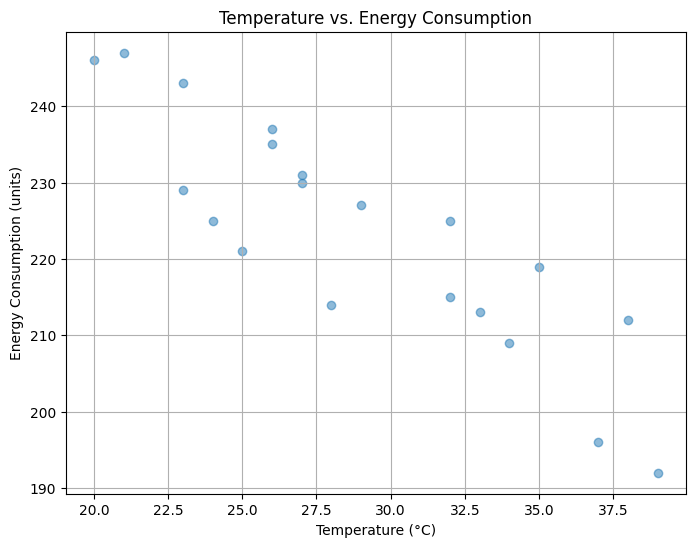

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature'], df['energy_consumption'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (units)')
plt.title('Temperature vs. Energy Consumption')
plt.grid(True)
plt.show()

-----

### 3. Adding a Previous Day's Consumption Feature

In [ ]:
df['previous_day_consumption'] = df['energy_consumption'].shift(1)

df = df.dropna()

print("\nFirst 5 rows after adding 'previous_day_consumption' feature:")
df.head()


First 5 rows after adding 'previous_day_consumption' feature:


date  temperature  energy_consumption  previous_day_consumption
1  2025-01-03           20                 246                     219.0
2  2025-01-04           23                 243                     246.0
3  2025-01-05           23                 229                     243.0
4  2025-01-06           27                 231                     229.0
5  2025-01-07           29                 227                     231.0

-----

### 4. Split Data into Features (X) and Target (y)

In [ ]:
X = df[['temperature', 'previous_day_consumption']]
y = df['energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples: 19
Training samples: 15
Testing samples: 4


-----

### 5. Train Linear Regression Model

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression Model training complete.")

Linear Regression Model training complete.


-----

### 6. Make Predictions

In [ ]:
y_pred = model.predict(X_test)

-----

### 7. Evaluate the Model


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" R² Score: {r2:.2f}")

--- Model Evaluation ---
 Mean Absolute Error (MAE): 7.74
 R² Score: 0.54


-----

### 8. Visualize Predictions

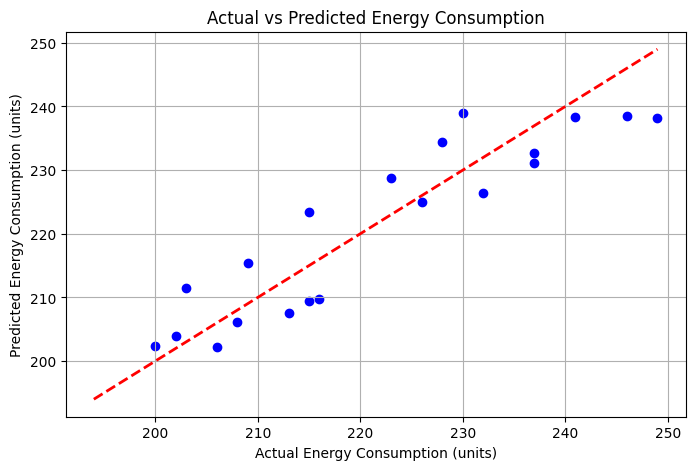

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Energy Consumption (units)")
plt.ylabel("Predicted Energy Consumption (units)")
plt.title("Actual vs Predicted Energy Consumption")
plt.grid(True)
plt.show()

-----

### 9. Predict for New Data


In [ ]:
new_data = pd.DataFrame({
    'temperature': [30],
    'previous_day_consumption': [220]
})

predicted = model.predict(new_data)

print(f"--- New Prediction ---")
print(f" Predicted Energy Consumption: {predicted[0]:.2f} units")

--- New Prediction ---
 Predicted Energy Consumption: 218.93 units
